#Assignment 2- ML – Classification – Naïve Bayes & Decision Tree

Name : Mayur Choudhari

Roll No.: 46

##Problem Statement
The data set contains 416 liver patient records and 167 non liver patient records 
collected from North East of Andhra Pradesh, India. The "Dataset" column is a class 
label used to divide groups into liver patient (liver disease) or not (no disease). This 
data set contains 441 male patient records and 142 female patient records. 

Any patient whose age exceeded 89 is listed as being of age "90".

Attributes/Columns:

• Age of the patient

• Gender of the patient

• Total Bilirubin

• Direct Bilirubin

• Alkaline Phosphotase

• Alamine Aminotransferase

• Aspartate Aminotransferase

• Total Protiens

• Albumin

• Albumin and Globulin Ratio

• Dataset: field used to split the data into two sets (patient with liver disease, or no 
disease)

Use these patient records to determine which patients have liver disease and which 
ones do not. Perform the following operations.


###Load the necessary packages

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns

###Exploring the data

In [4]:
df = pd.read_csv("indian_liver_patient.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,582.0,1.488144,2.810482,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,581.0,290.254733,242.925760,63.0,176.0,208.00,298.0,2110.0
Alamine_Aminotransferase,581.0,80.542169,182.835984,10.0,23.0,35.00,60.0,2000.0
Aspartate_Aminotransferase,580.0,110.156897,289.641517,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,582.0,3.141753,0.796199,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,578.0,0.946972,0.319861,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [6]:
df.isnull().sum()

Age                           0
Gender                        3
Total_Bilirubin               0
Direct_Bilirubin              1
Alkaline_Phosphotase          2
Alamine_Aminotransferase      2
Aspartate_Aminotransferase    3
Total_Protiens                0
Albumin                       1
Albumin_and_Globulin_Ratio    5
Dataset                       0
dtype: int64

In [7]:
df['Gender'].value_counts()

Male      439
Female    140
dsfsf       1
Name: Gender, dtype: int64

In [8]:
df[df.Gender.isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
9,55,NaN,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.0,1
29,84,NaN,0.7,0.2,188.0,13.0,21.0,6.0,NaN,1.1,2
57,48,NaN,0.9,0.2,175.0,24.0,NaN,5.5,2.7,0.9,2


In [9]:
#check the null value in a particular row
df[df.isnull().any(axis=1)]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
9,55,NaN,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1
12,64,Male,0.9,NaN,310.0,61.0,58.0,7.0,3.4,0.90,2
14,61,Male,0.7,0.2,145.0,53.0,NaN,5.8,2.7,0.87,1
29,84,NaN,0.7,0.2,188.0,13.0,21.0,6.0,NaN,1.10,2
31,52,Male,0.9,0.2,NaN,35.0,44.0,4.9,2.9,1.40,1
57,48,NaN,0.9,0.2,175.0,24.0,NaN,5.5,2.7,0.90,2
93,60,Male,5.8,2.7,204.0,NaN,400.0,7.0,3.0,0.70,1
105,36,Male,5.3,2.3,145.0,32.0,NaN,5.1,2.6,1.00,2
118,32,Male,15.9,7.0,280.0,1350.0,1600.0,5.6,2.8,NaN,1
209,45,Female,0.9,0.3,189.0,23.0,33.0,6.6,3.9,NaN,1


In [10]:
#To check the unknown value in column gender
df[df.Gender=='dsfsf']

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
27,34,dsfsf,6.2,3.0,240.0,1680.0,850.0,7.2,4.0,1.2,1


In [11]:
col = ['Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Albumin','Albumin_and_Globulin_Ratio']

In [12]:
for c in col:
  imputer  = SimpleImputer(missing_values=np.nan, strategy='mean')
  df[c]=imputer.fit_transform(df[[c]])

In [13]:
df.isnull().sum()

Age                           0
Gender                        3
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [14]:
#To check, number males, females & other in a gender column
df['Gender'].value_counts()

Male      439
Female    140
dsfsf       1
Name: Gender, dtype: int64

In [15]:
#create new variable for storing the dataset in temperorily
df_new = df
df_new.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [16]:
#To select the particular row

ind_9 = df_new.iloc[9, :].values  
ind_29 = df_new.iloc[29, :].values
ind_57 = df_new.iloc[57, :].values
ind_27 = df_new.iloc[27, :].values

In [17]:
#Remove the rows
df_new = df_new.drop([9,29,57,27], axis=0)

In [18]:
#To check the null values present in all atribute
df_new.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [19]:
#Make a Gender attribute as a target attribute
df_new['Gender'] = df_new.pop('Gender')
df_new.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender
0,65,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,Female
1,62,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,Male
2,62,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,Male
3,58,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,Male
4,72,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,Male


In [20]:
#To convert Gender attribute from string to numeric
lbl = LabelEncoder()
df_new['Gender'] = lbl.fit_transform(df_new['Gender'])

#show the dataset
df_new.head()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender
0,65,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,1


In [21]:
#To check the number of unique values present in a attribute Gender
df_new['Gender'].nunique()

2

In [22]:
#Seprate the dataset for training and testing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=143)

In [23]:
#Using the GaussianNB method
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

#Identify the missing values and fill them with an appropriate method, if there are any missing values

1) Predicting the attribute Gender at Index No.: 9

Male -> 1

Female -> 0

In [24]:
ind_9

array([55, nan, 0.7, 0.2, 290.0, 53.0, 58.0, 6.8, 3.4, 1.0, 1],
      dtype=object)

In [25]:
ind_9_array = [[55,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.0,1]]

In [26]:
ind_9_pred = clf.predict(ind_9_array)

In [27]:
ind_9_pred

array([0])

2)Predicting the attribute Gender at Index No.: 27

Male -> 1

Female -> 0

In [28]:
ind_27

array([34, 'dsfsf', 6.2, 3.0, 240.0, 1680.0, 850.0, 7.2, 4.0, 1.2, 1],
      dtype=object)

In [29]:
ind_27_array = [[34,6.2,3.0,240.0,1680.0,850.0,7.2,4.0,1.2,1]]

In [30]:
ind_27_pred = clf.predict(ind_27_array)

In [31]:
ind_27_pred

array([1])

3)Predicting the attribute Gender at Index No.: 29

Male -> 1

Female -> 0

In [32]:
ind_29

array([84, nan, 0.7, 0.2, 188.0, 13.0, 21.0, 6.0, 3.1417525773195876, 1.1,
       2], dtype=object)

In [33]:
ind_29_array = [[84,0.7,0.2,188.0,13.0,21.0,6.0,3.14,1.1,2]]

In [34]:
ind_29_pred = clf.predict(ind_29_array)

In [35]:
ind_29_pred

array([1])

4)Predicting the attribute Gender at Index No.: 57

Male -> 1

Female -> 0

In [36]:
ind_57

array([48, nan, 0.9, 0.2, 175.0, 24.0, 110.15689655172413, 5.5, 2.7, 0.9,
       2], dtype=object)

In [37]:
ind_57_array = [[48,0.9,0.2,175.0,24.0,110.15,5.5,2.7,0.9,2]]

In [38]:
ind_57_pred = clf.predict(ind_57_array)

In [39]:
ind_57_pred

array([0])

Replacing null values from Gender attribute with predicted Values

In [40]:
df.loc[9,'Gender'] = 'Female'
df.loc[27,'Gender'] = 'Male'
df.loc[29, 'Gender'] = 'Male'
df.loc[57, 'Gender']= 'Female'

In [41]:
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154.0,16.0,12.0,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
9,55,Female,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1


#Convert the string into numeric from Attribute Gender
Using the label encoding

In [42]:
df['Gender'] = lbl.fit_transform(df['Gender'])
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154.0,16.0,12.0,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
9,55,0,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1


#Normalize all the attributes using an appropriate method.

In [43]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [44]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [45]:
scaler = MinMaxScaler()
col = ['Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']

In [46]:
scaler = MinMaxScaler()
for c in col :
  df[[c]] = scaler.fit_transform(df[[c]])

In [47]:
df[['Age']] = scaler.fit_transform(df[['Age']])
df[['Gender']] = scaler.fit_transform(df[['Gender']])
df[['Dataset']] = scaler.fit_transform(df[['Dataset']])

In [48]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,0.0
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0.0
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0.0
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0.0
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0.0


#Compare the performance of both the models (NB and DT)
Split the data for Training and Testing

In [49]:
X = df.drop('Dataset',axis=1)
y = df['Dataset']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

a) Naive Bayes

In [50]:
clf_NB = GaussianNB()
clf_NB.fit(X_train,y_train)

GaussianNB()

In [51]:
pred = clf_NB.predict(X_test)
accuracy_score(pred, y_test)

0.5128205128205128

In [52]:
clf_Ber = BernoulliNB()
clf_Ber.fit(X_train, y_train)

BernoulliNB()

In [53]:
pred_Ber = clf_Ber.predict(X_test)
accuracy_score(pred_Ber, y_test)*100

76.06837606837607

b) Decision Tree

In [54]:
clf_DT = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [55]:
pred1 = clf_DT.predict(X_test)
accuracy_score(pred1,y_test)*100

70.08547008547008

Decision Tree gives better performace beacause more accuracy.

Accuracy:

GaussianNB = 51.28 %

BernoulliNB = 76.06 %

Decision Tree = 70.08 %

#ANALYZE THE DATA

1. Find out if there are any attributes with correlation more than 0.50

<Axes: >

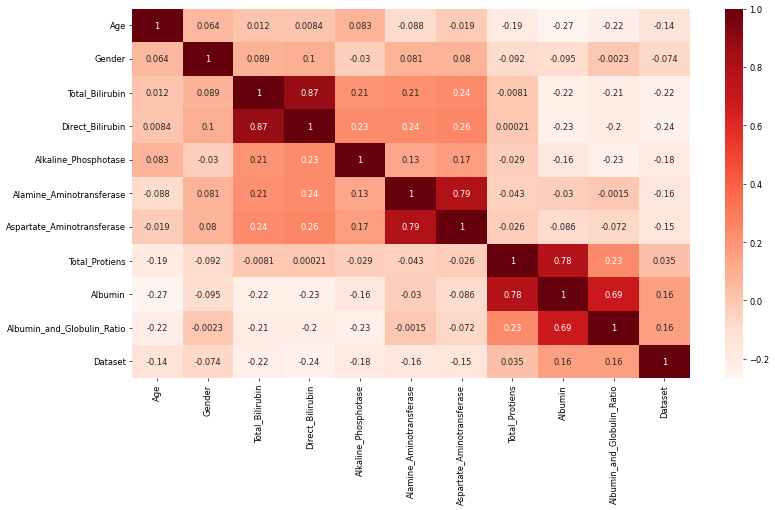

In [56]:
corr=df.corr()
plt.figure(figsize=(15,8), dpi=60) 
sns.heatmap(corr,cmap="Reds",annot=True)


*   There are four pair of correlation more than 0.5
*   This correlation are below :

1.   Albumin & Albumin and Globulin Ratio
2.   Albumin & Total Protiens
3.   Alamine Aminotransferase & Aspartate Aminotransferase
4.   Total Bilirubin & Direct Bilirubin

In [57]:
correlation_matrix = df.corr()

# Finding attribute pairs with correlation greater than 0.50
high_correlation = correlation_matrix[correlation_matrix > 0.50]
high_correlation = high_correlation.unstack().sort_values(ascending=False)

# Filter out self-correlations and correlations equal to 1
high_correlation = high_correlation[high_correlation < 1].dropna()

print(high_correlation)


Direct_Bilirubin            Total_Bilirubin               0.874471
Total_Bilirubin             Direct_Bilirubin              0.874471
Alamine_Aminotransferase    Aspartate_Aminotransferase    0.790921
Aspartate_Aminotransferase  Alamine_Aminotransferase      0.790921
Total_Protiens              Albumin                       0.784113
Albumin                     Total_Protiens                0.784113
                            Albumin_and_Globulin_Ratio    0.686403
Albumin_and_Globulin_Ratio  Albumin                       0.686403
dtype: float64


2. Visualize the attributes and find out if there are any outliers using box plot or any other related plot.

<function matplotlib.pyplot.show(close=None, block=None)>

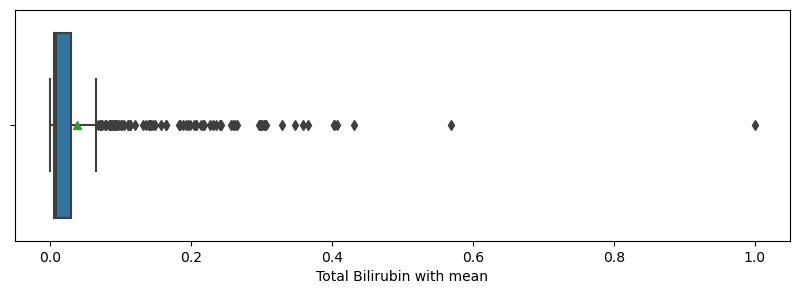

In [58]:
#To Show the boxplot of Total Bilirubin with mean for outlier
plt.figure(figsize=(10,3))
sns.boxplot(x=df['Total_Bilirubin'], showmeans=True)
plt.xlabel('Total Bilirubin with mean')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

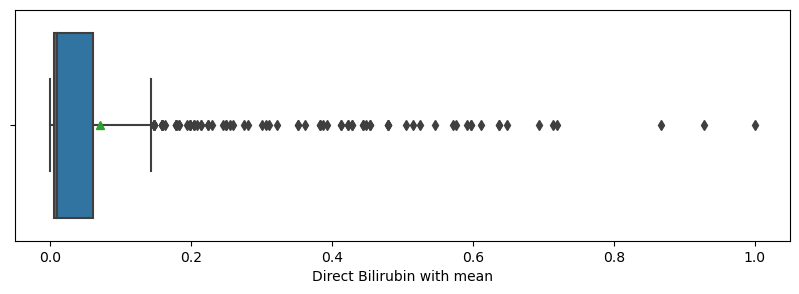

In [59]:
#To Show the boxplot of Direct Bilirubin with mean for outlier
plt.figure(figsize=(10,3))
sns.boxplot(x=df['Direct_Bilirubin'], showmeans=True)
plt.xlabel('Direct Bilirubin with mean')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

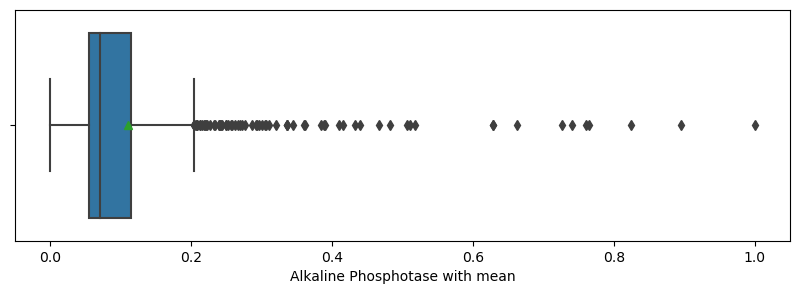

In [60]:
#To Show the boxplot of Alkaline Phosphotase with mean for outlier
plt.figure(figsize=(10,3))
sns.boxplot(x=df['Alkaline_Phosphotase'], showmeans=True)
plt.xlabel('Alkaline Phosphotase with mean')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

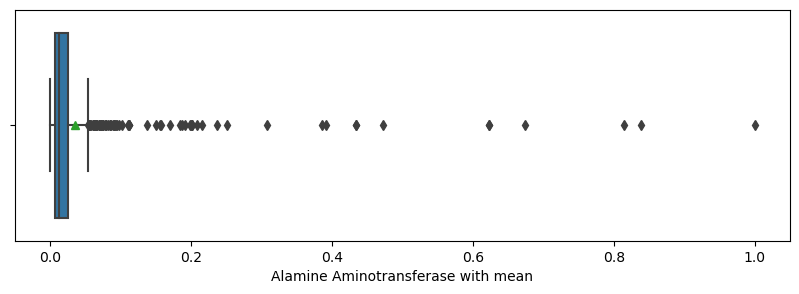

In [61]:
#To Show the boxplot of Alamine Aminotransferase with mean for outlier
plt.figure(figsize=(10,3))
sns.boxplot(x=df['Alamine_Aminotransferase'], showmeans=True)
plt.xlabel('Alamine Aminotransferase with mean')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

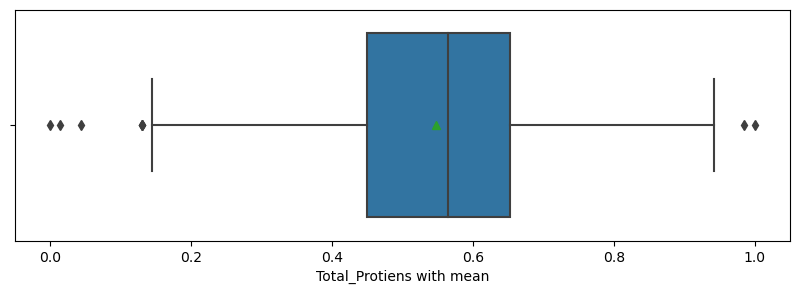

In [62]:
#To Show the boxplot of Total Protiens with mean for outlier
plt.figure(figsize=(10,3))
sns.boxplot(x=df['Total_Protiens'], showmeans=True)
plt.xlabel('Total_Protiens with mean')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

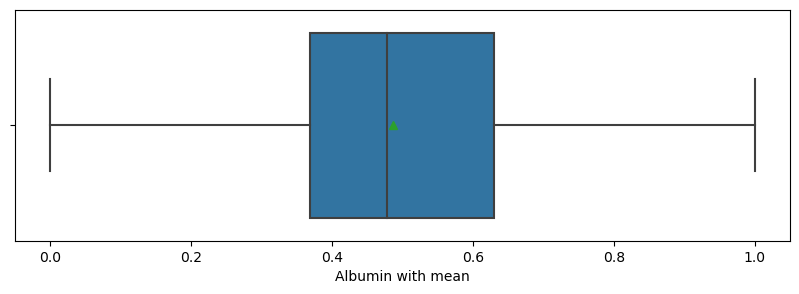

In [63]:
#To Show the boxplot of Albumin with mean for outlier
plt.figure(figsize=(10,3))
sns.boxplot(x=df['Albumin'], showmeans=True)
plt.xlabel('Albumin with mean')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

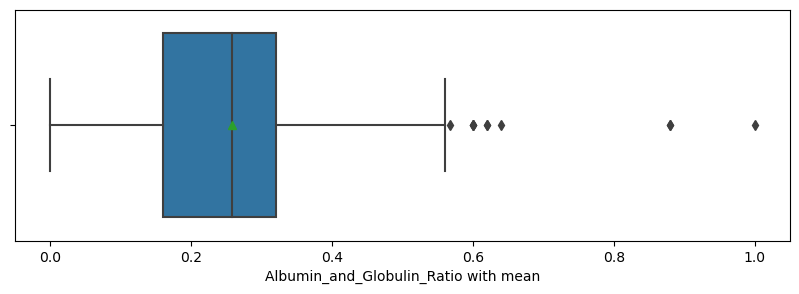

In [64]:
#To Show the boxplot of Albumin and Globulin Ratio with mean for outlier
plt.figure(figsize=(10,3))
sns.boxplot(x=df['Albumin_and_Globulin_Ratio'], showmeans=True)
plt.xlabel('Albumin_and_Globulin_Ratio with mean')
plt.show

3. Plot distribution plots and explain the dispersion.

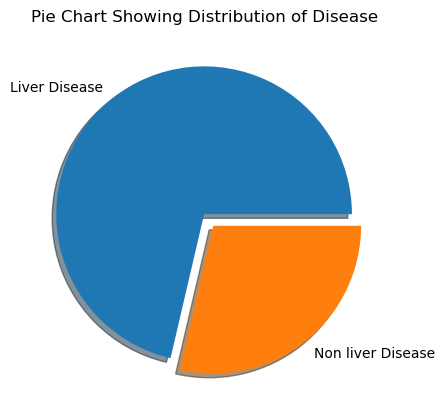

In [65]:
#to show the distribution of Disease
plt.pie(x=df["Dataset"].value_counts(), 
        labels=["Liver Disease","Non liver Disease"], 
        shadow = True, 
        explode = (0, 0.1)
        )
plt.title("Pie Chart Showing Distribution of Disease")
plt.show()


#Observation: Liver disease patients are more.

Text(0.5, 0, 'Age')

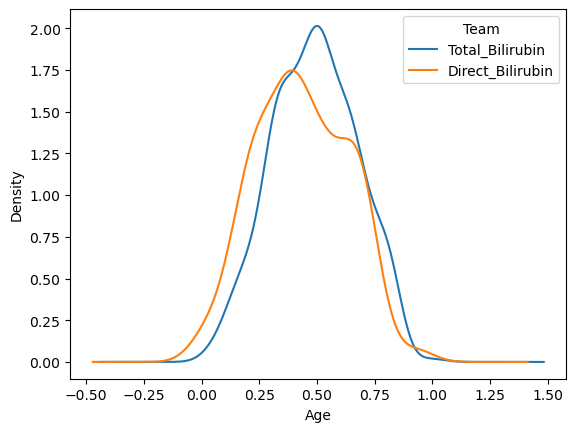

In [66]:
df.groupby('Dataset')['Age'].plot(kind='kde')

#add legend
plt.legend(['Total_Bilirubin', 'Direct_Bilirubin'], title='Team')

#add x-axis label
plt.xlabel('Age')

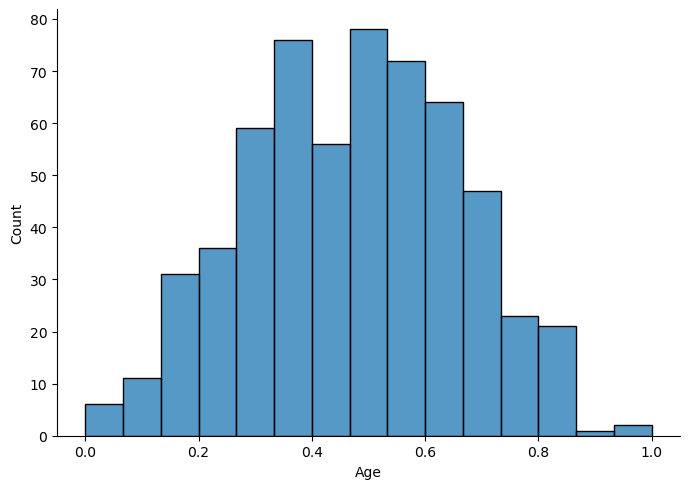

In [67]:
#distribution of age 
sns.displot(
  data=df,
  x="Age",
  kind="hist",
  aspect=1.4
)

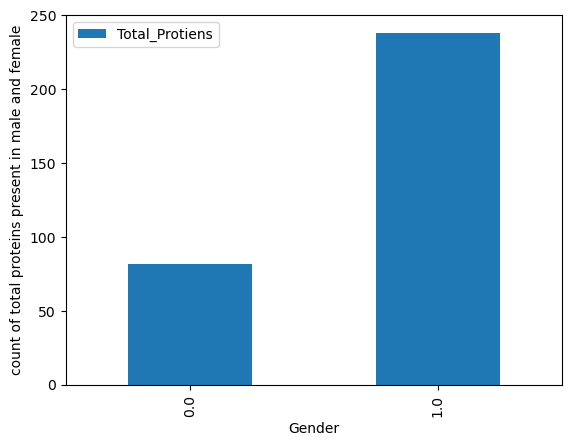

In [68]:
bar_age = df.groupby('Gender').sum()['Total_Protiens'].plot(kind = 'bar')
plt.xlabel('Gender')
plt.ylabel('count of total proteins present in male and female')
plt.legend()
plt.show()

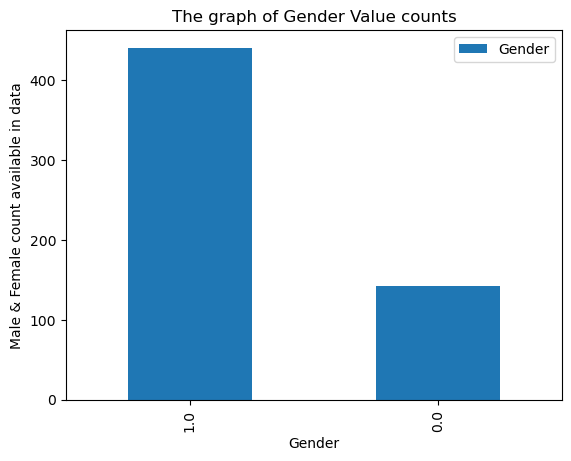

In [69]:
    bar_plot = df['Gender'].value_counts().plot(kind = 'bar')
    plt.xlabel('Gender')
    plt.ylabel('Male & Female count available in data')
    plt.title('The graph of Gender Value counts')
    plt.legend()
    plt.show()  

#Build the model & Perform 5-fold cross validation

In [70]:
#k-fold cross validation
from sklearn.metrics import recall_score
y_pr = cross_val_predict(clf, X_train, y_train, cv=5)

In [71]:
#Confusion matrix
confusion_matrix(y_train, y_pr)

array([[124, 205],
       [  7, 130]], dtype=int64)

In [72]:
#recall
recall_score(y_test, pred1)*100

76.66666666666667

In [73]:
#precision
precision_score(y_test, pred1)*100

45.09803921568628

In [74]:
#F1 Score
f1_score(y_test, pred1)*100

56.790123456790134

In [75]:
#AUC
roc_auc_score(y_test, pred1)*100

72.24137931034483

#Perform hyperparameter optimization using Random Search, Grid Search and TPE. Which method gives best model? Explain.
















In [76]:
from sklearn.model_selection import RandomizedSearchCV

params = {'max_leaf_nodes': list(range(2, 10)), # 8 params
          'min_samples_split': [2, 3, 4]} # 3 params


random_search_CV = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                                      params, 
                                      verbose=1,
                                      cv=3)
random_search_CV.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9],
                                        'min_samples_split': [2, 3, 4]},
                   verbose=1)

In [77]:
pred_random_search = random_search_CV.predict(X_test)
accuracy_score(pred_random_search, y_test)*100

74.35897435897436

##2. Grid Search

In [78]:
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                              params, 
                              verbose=1, 
                              cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [79]:
pred_grid_search = grid_search_cv.predict(X_test)
accuracy_score(pred_grid_search, y_test)*100

74.35897435897436

In [83]:
import pickle

filename = "grid_search.sav"
pickle.dump(pred_grid_search,open(filename,'wb'))